# MovieLens Dataset Exploration


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

## Load the Dataset


In [3]:
# Define paths
DATA_DIR = Path("../data/raw/ml-latest-small")

# Load datasets
movies = pd.read_csv(DATA_DIR / "movies.csv")
ratings = pd.read_csv(DATA_DIR / "ratings.csv")
tags = pd.read_csv(DATA_DIR / "tags.csv")
links = pd.read_csv(DATA_DIR / "links.csv")

print(f"Movies dataset shape: {movies.shape}")
print(f"Ratings dataset shape: {ratings.shape}")
print(f"Tags dataset shape: {tags.shape}")
print(f"Links dataset shape: {links.shape}")

Movies dataset shape: (9742, 3)
Ratings dataset shape: (100836, 4)
Tags dataset shape: (3683, 4)
Links dataset shape: (9742, 3)


## Explore the Movies Dataset

In [4]:
# View the first few rows of the movies dataset
print("Movies dataset:")
movies.head()

Movies dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Check for missing values
print("Missing values in movies dataset:")
movies.isnull().sum()

Missing values in movies dataset:


movieId    0
title      0
genres     0
dtype: int64

In [6]:
# Extract year from title and add as a new column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)$')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

# Display updated movies dataset
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


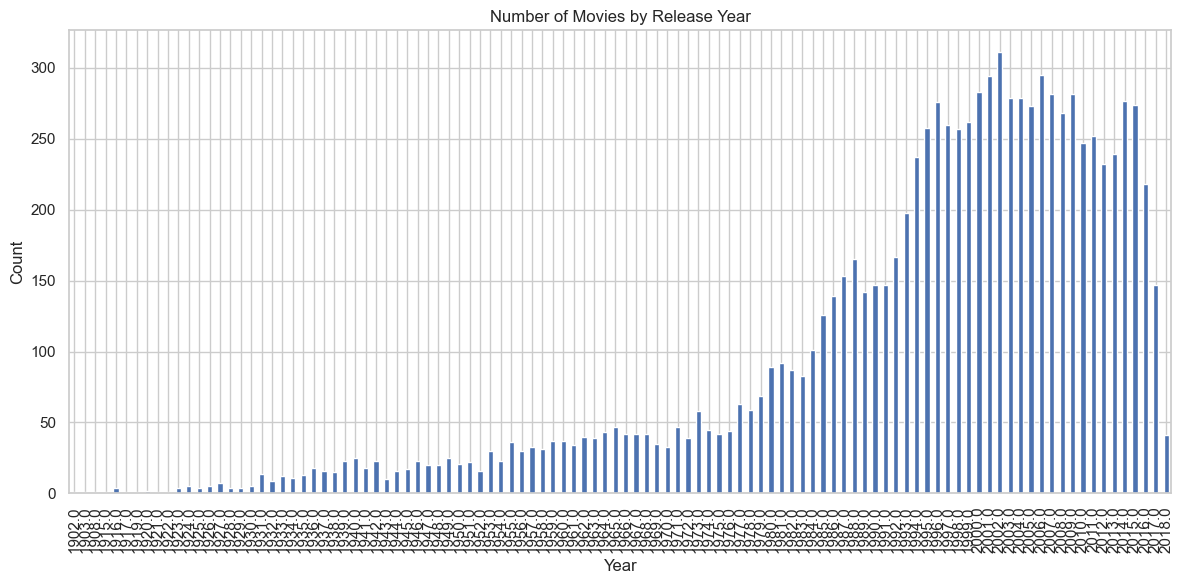

In [7]:
# Analyze movie distribution by year
plt.figure(figsize=(12, 6))
movies['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

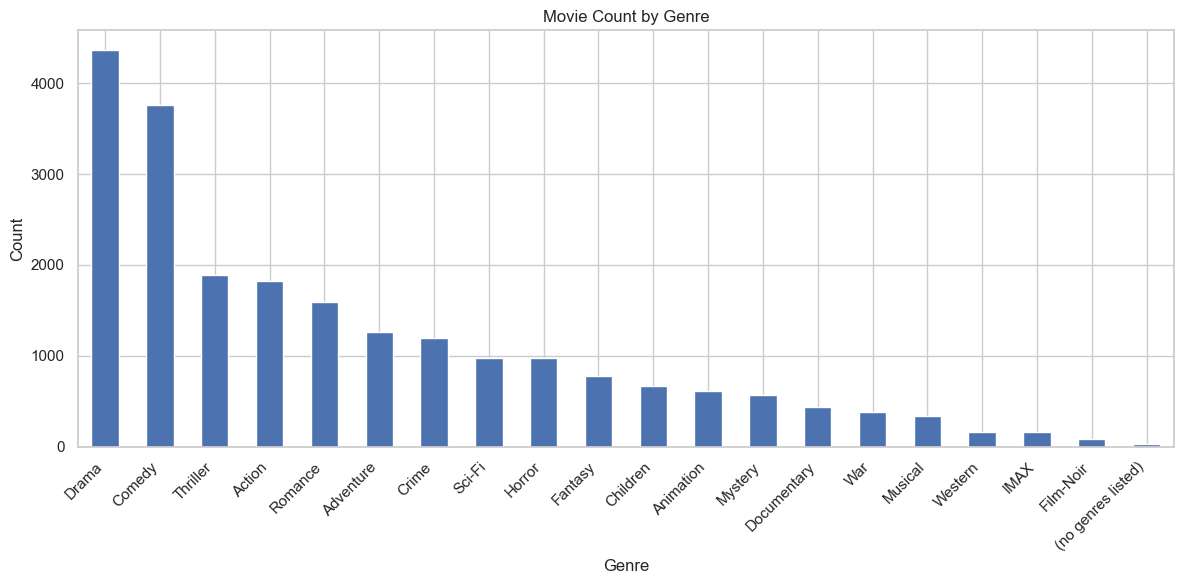

Number of movies by genre:


genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

In [8]:
# Analyze genre distribution
# First, explode the genres column
genres = movies['genres'].str.split('|').explode()

# Count occurrences of each genre
genre_counts = genres.value_counts()

# Plot genre distribution
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the genre counts
print("Number of movies by genre:")
genre_counts

## Explore the Ratings Dataset

In [9]:
# View the first few rows of the ratings dataset
print("Ratings dataset:")
ratings.head()

Ratings dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
# Basic statistics of ratings
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

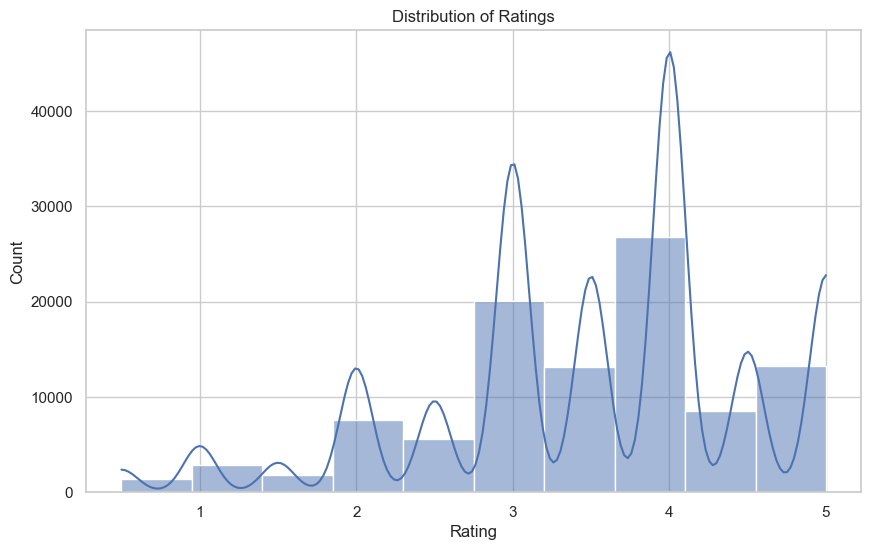

In [13]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

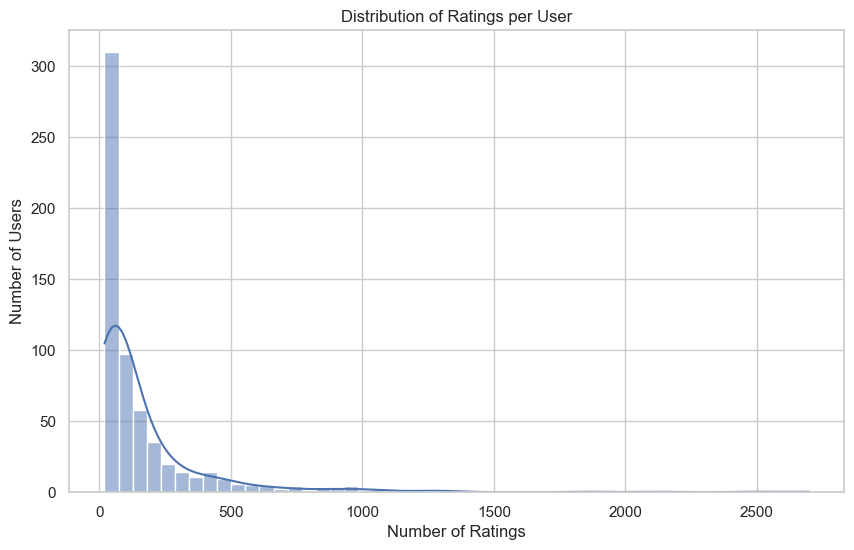

Average number of ratings per user: 165.30
Median number of ratings per user: 70.50
Minimum number of ratings per user: 20
Maximum number of ratings per user: 2698


In [14]:
# Analyze user activity
user_ratings_count = ratings.groupby('userId').size()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

print(f"Average number of ratings per user: {user_ratings_count.mean():.2f}")
print(f"Median number of ratings per user: {user_ratings_count.median():.2f}")
print(f"Minimum number of ratings per user: {user_ratings_count.min()}")
print(f"Maximum number of ratings per user: {user_ratings_count.max()}")

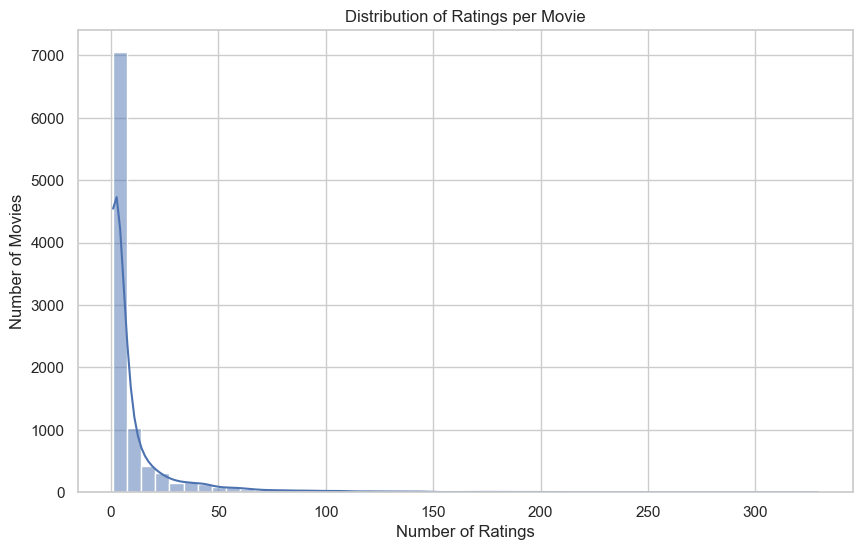

Average number of ratings per movie: 10.37
Median number of ratings per movie: 3.00
Minimum number of ratings per movie: 1
Maximum number of ratings per movie: 329


In [15]:
# Analyze movie popularity
movie_ratings_count = ratings.groupby('movieId').size()

plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

print(f"Average number of ratings per movie: {movie_ratings_count.mean():.2f}")
print(f"Median number of ratings per movie: {movie_ratings_count.median():.2f}")
print(f"Minimum number of ratings per movie: {movie_ratings_count.min()}")
print(f"Maximum number of ratings per movie: {movie_ratings_count.max()}")

## Analyze User-Movie Interaction Matrix Sparsity

In [16]:
# Calculate matrix sparsity
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)

matrix_sparsity = 1.0 - n_ratings / (n_users * n_movies)

print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")
print(f"Number of ratings: {n_ratings}")
print(f"Matrix sparsity: {matrix_sparsity:.4f} (higher means more sparse)")

Number of users: 610
Number of movies: 9724
Number of ratings: 100836
Matrix sparsity: 0.9830 (higher means more sparse)


## Top Movies Analysis

In [17]:
# Find top rated movies (with minimum 100 ratings)
movie_stats = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
movie_stats.columns = ['count', 'mean_rating']
popular_movies = movie_stats[movie_stats['count'] >= 100].sort_values('mean_rating', ascending=False)

# Merge with movie titles
top_movies = popular_movies.merge(movies[['movieId', 'title', 'genres', 'year']], 
                                 left_index=True, 
                                 right_on='movieId')

# Display top 20 movies
print("Top 20 Highest Rated Movies (min 100 ratings):")
top_movies[['title', 'year', 'count', 'mean_rating', 'genres']].head(20)

Top 20 Highest Rated Movies (min 100 ratings):


,title,year,count,mean_rating,genres
277,"Shawshank Redemption, The",1994.0,317,4.429022,Crime|Drama
659,"Godfather, The",1972.0,192,4.289062,Crime|Drama
2226,Fight Club,1999.0,218,4.272936,Action|Crime|Drama|Thriller
922,"Godfather: Part II, The",1974.0,129,4.259690,Crime|Drama
6315,"Departed, The",2006.0,107,4.252336,Crime|Drama|Thriller
914,Goodfellas,1990.0,126,4.250000,Crime|Drama
694,Casablanca,1942.0,100,4.240000,Drama|Romance
6710,"Dark Knight, The",2008.0,149,4.238255,Action|Crime|Drama|IMAX
46,"Usual Suspects, The",1995.0,204,4.237745,Crime|Mystery|Thriller
899,"Princess Bride, The",1987.0,142,4.232394,Action|Adventure|Comedy|Fantasy|Romance


## Summary of Findings

Based on the exploration above, here are the key observations (on the small dataset):

1. **Dataset Size**: 
   - Number of users: 610
   - Number of movies: 9724
   - Number of ratings: 100836

2. **Rating Distribution**: 
   - Mean rating:  3.501557
   - Most common rating: 4/5 rating

3. **User Activity**:
   - Average ratings per user: 165.30
   - Most active user has 2698 ratings

4. **Movie Popularity**:
   - Average ratings per movie: 10.37
   - Most popular movie has 329 ratings

5. **Matrix Sparsity**: 98.30% (0.9830) (this indicates how much of the user-movie matrix contains no ratings)

6. **Genre Distribution**: The most common genres are Drama and Comedy, a lot of movies have those two genres

7. **Movie Release Years**: Peak years for movies in the dataset are early to mid 2000's
